<a href="https://colab.research.google.com/github/felipepizzinato/analise_churn/blob/main/projeto_pessoal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
url = '/content/Telco_customer_churn.xlsx'
df = pd.read_excel(url)
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.shape

(7043, 33)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [ ]:
df.drop(columns=['CustomerID','Count', 'Country', 'State', 'Zip Code','Lat Long','Churn Reason'],inplace=True)
df.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Los Angeles,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Los Angeles,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Los Angeles,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,Los Angeles,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Los Angeles,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


In [ ]:
df.shape

(7043, 26)

In [ ]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-a3b5cbf66ecf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette='viridis')


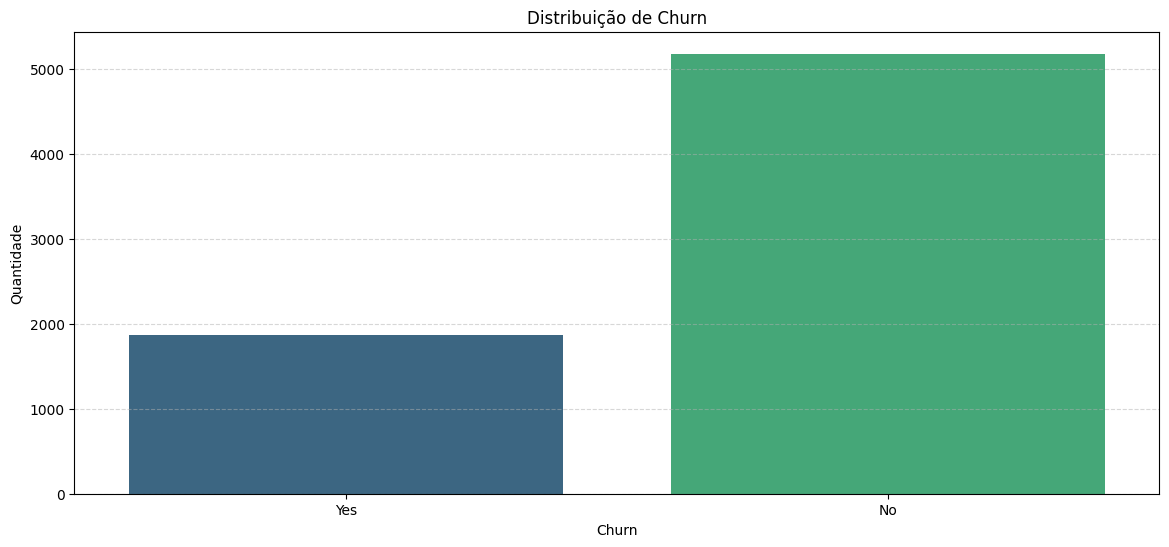

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# churn_counts = df['Churn Label'].value_counts()
# x = churn_counts.index
# y = churn_counts.values

# plt.bar(x, y)
# plt.title('Distribuição de Churn')
# plt.xlabel('Churn')
# plt.ylabel('Quantidade')
# plt.grid(axis='y', linestyle='--', alpha=0.5)

# plt.show()
plt.figure(figsize=(14, 6))
sns.countplot(x='Churn Label', data=df, palette='viridis')

plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



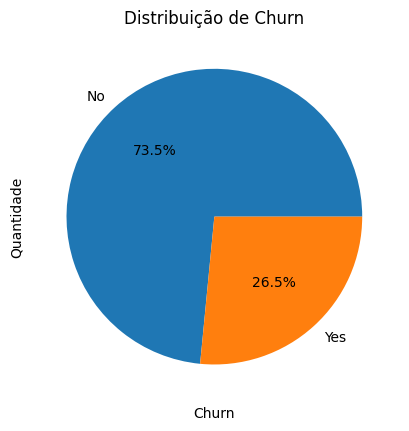

In [ ]:
churn_counts = df['Churn Label'].value_counts()
x = churn_counts.values
y = churn_counts.index


plt.pie(x, labels=y, autopct='%1.1f%%')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')

plt.show()


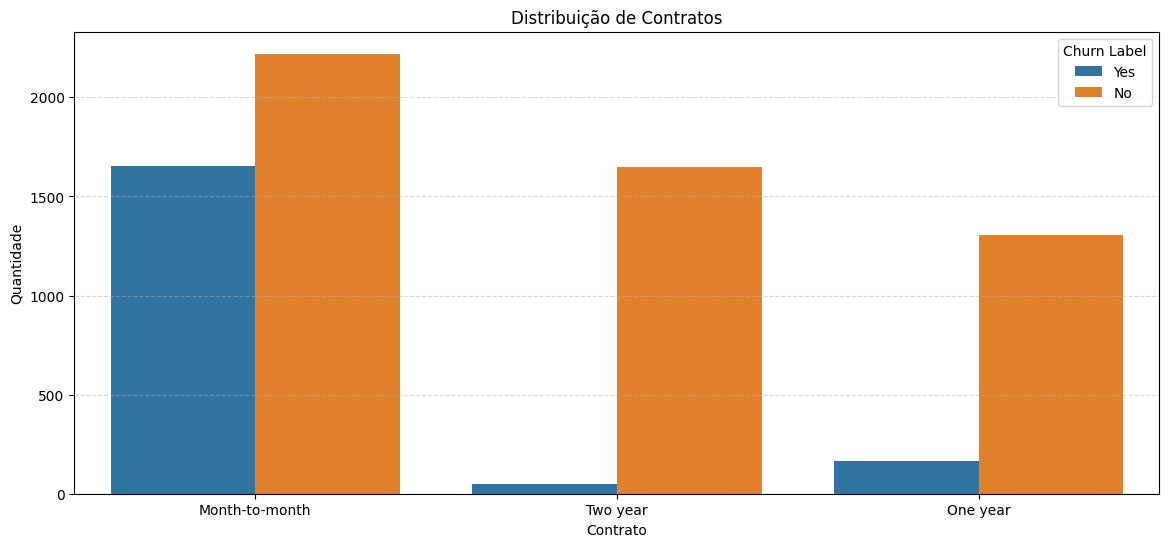

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Distribuição de Contratos')
plt.xlabel('Contrato')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

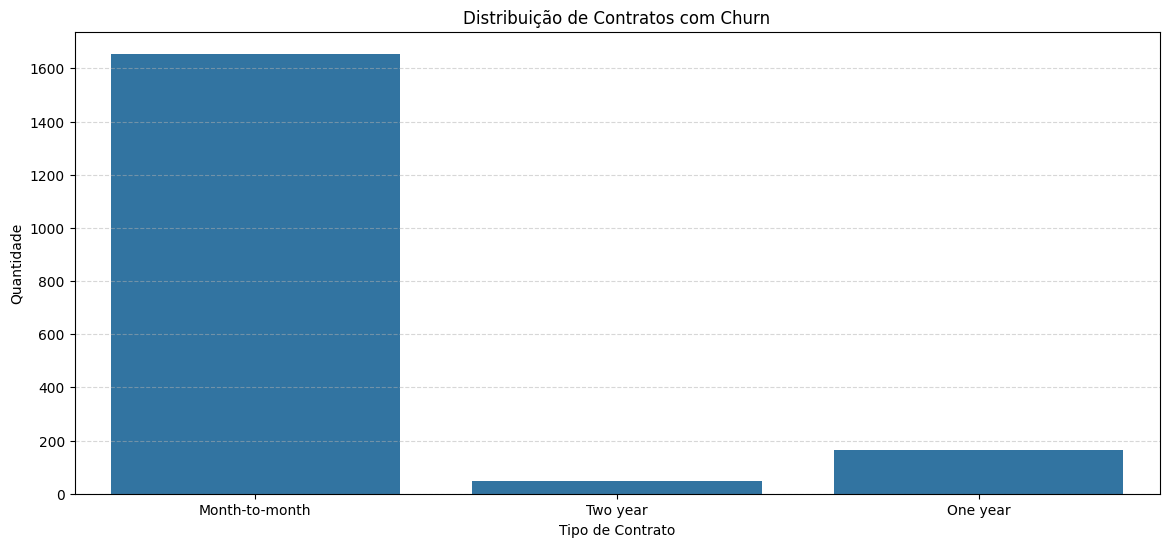

In [ ]:
plt.figure(figsize=(14, 6))
df_churn = df[df['Churn Value'] == 1]

sns.countplot(x='Contract', data=df_churn)
plt.title('Distribuição de Contratos com Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


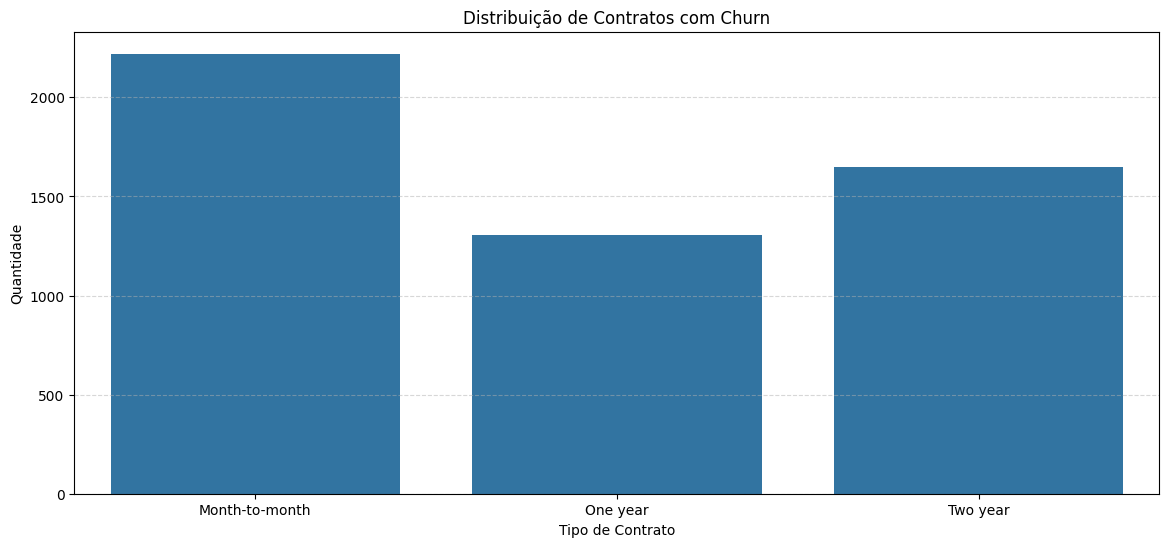

In [ ]:
df_churn = df[df['Churn Value'] == 0]

plt.figure(figsize=(14, 6))
sns.countplot(x='Contract', data=df_churn)
plt.title('Distribuição de Contratos com Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


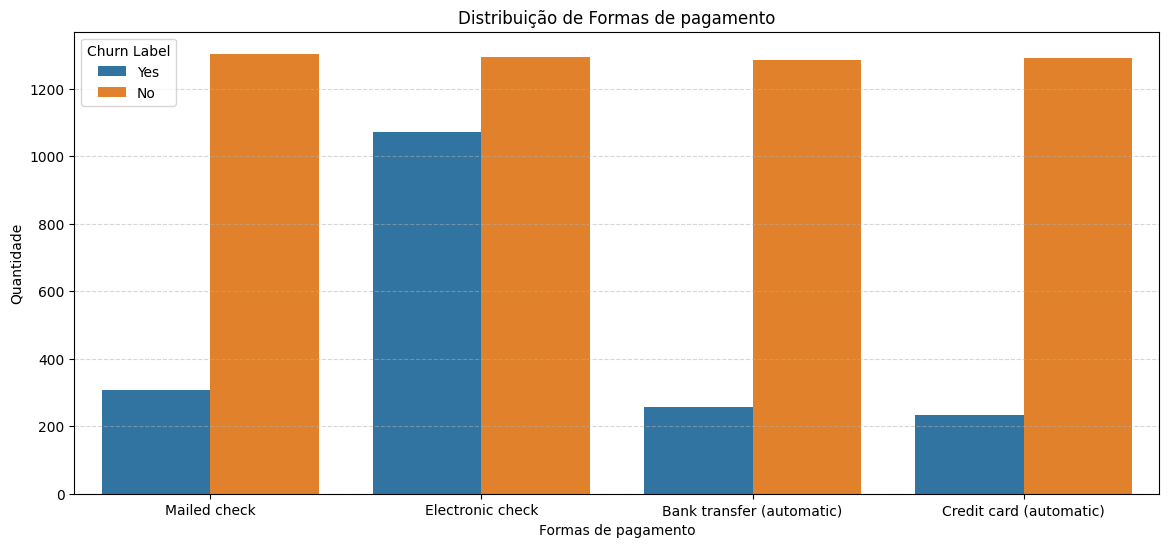

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Payment Method', hue='Churn Label', data=df)
plt.title('Distribuição de Formas de pagamento')
plt.xlabel('Formas de pagamento')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
payment_method_counts = df[df['Churn Value'] == 0]['Payment Method'].value_counts()
payment_method_counts

,count
Payment Method,
Mailed check,1304
Electronic check,1294
Credit card (automatic),1290
Bank transfer (automatic),1286


In [ ]:
df['Tenure Months'].value_counts()

,count
Tenure Months,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


KeyError: 'Column not found: Monthly Charge'